# Mod 6 Final Project

Jeremy Owens, Bridget Boakye

### Problem Statement:

We need to find Pulsars, know where to focus telescopes for Pulsar analysis

## Import

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, advanced_activations
from keras import initializers, regularizers
from keras.optimizers import RMSprop, Adam, SGD
from keras.utils.np_utils import to_categorical
# from keras.preprocessing.text import Tokenizer

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE, SVMSMOTE, KMeansSMOTE
from imblearn.over_sampling import ADASYN

from sklearn.decomposition import PCA

random_seed = 123

Using TensorFlow backend.


In [4]:
pulsar_df = pd.read_csv('pulsar_stars.csv')
pulsar_df.head(10)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
5,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0
6,119.484375,48.765059,0.031460,-0.112168,0.999164,9.279612,19.206230,479.756567,0
7,130.382812,39.844056,-0.158323,0.389540,1.220736,14.378941,13.539456,198.236457,0
8,107.250000,52.627078,0.452688,0.170347,2.331940,14.486853,9.001004,107.972506,0
9,107.257812,39.496488,0.465882,1.162877,4.079431,24.980418,7.397080,57.784738,0


In [5]:
for col in pulsar_df.columns:
    print(min(pulsar_df[col]), max(pulsar_df[col]))

5.8125 192.6171875
24.77204176 98.77891067
-1.876011181 8.069522046
-1.7918859809999999 68.10162173
0.213210702 223.39214049999998
7.370432165 110.64221059999998
-3.1392696110000005 34.53984419
-1.976975603 1191.0008369999998
0 1


In [6]:
pulsar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 Mean of the integrated profile                  17898 non-null float64
 Standard deviation of the integrated profile    17898 non-null float64
 Excess kurtosis of the integrated profile       17898 non-null float64
 Skewness of the integrated profile              17898 non-null float64
 Mean of the DM-SNR curve                        17898 non-null float64
 Standard deviation of the DM-SNR curve          17898 non-null float64
 Excess kurtosis of the DM-SNR curve             17898 non-null float64
 Skewness of the DM-SNR curve                    17898 non-null float64
target_class                                     17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


activation - leaky relu for interior, sigmoid for end

hidden layers - 2

neurons in layers ~50

optimizer - not needed, runs plenty fast

dropout - no, too few predictors already

batch size - 32

epochs - 15

In [7]:
X = pulsar_df.drop('target_class', axis=1)
y = pulsar_df['target_class']
features = X.columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(14318, 8) (3580, 8)
(14318,) (3580,)


In [32]:
X = pulsar_df.drop('target_class', axis=1)
y = pulsar_df['target_class']
features = X.columns

scalar = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=random_seed)  

X_train = scalar.fit_transform(X_train)

# scalar = StandardScaler()
# X_val = scalar.fit_transform(X_val)

scalar = StandardScaler()
X_test = scalar.fit_transform(X_test)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(14318, 8) (3580, 8)
(14318,) (3580,)


In [38]:
print(y.value_counts()) #Previous original class distribution
smote = KMeansSMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 
print(pd.Series(y_train_resampled).value_counts()) #Preview synthetic sample class distribution

0    16259
1     1639
Name: target_class, dtype: int64
1    13028
0    13027
dtype: int64


In [24]:
print(y.value_counts()) #Previous original class distribution
adasyn = ADASYN()
X_train_resampled, y_train_resampled = adasyn.fit_sample(X_train, y_train) 
print(pd.Series(y_train_resampled).value_counts()) #Preview synthetic sample class distribution

0    16259
1     1639
Name: target_class, dtype: int64
0    13027
1    12968
dtype: int64


## Classic ML Test

In [35]:
def grid_search_classifier(clf, param_grid, X_train, X_test, y_train, y_test, scoring='f1_weighted'):
    grid_clf = GridSearchCV(clf, param_grid, scoring=scoring)
    grid_clf.fit(X_train, y_train)

    best_parameters = grid_clf.best_params_

    print("Grid Search found the following optimal parameters: ")
    for param_name in sorted(best_parameters.keys()):
        print("%s: %r" % (param_name, best_parameters[param_name]))

    y_pred = grid_clf.predict(X_test)

    print()
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print('Accuracy score:', round(accuracy_score(y_test, y_pred), 4))

    cm = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis],
                         index=['F', 'T'],
                         columns=['F', 'T'])
    plt.figure(figsize=(7, 5))
    sns.heatmap(df_cm, annot=True, cmap='Greens')
    plt.xlabel('Pred Val')
    plt.ylabel('True Val')
    plt.show()
    return grid_clf

In [36]:
param_grid = {'max_depth': [3, 5, 10, 15],
              'max_features': [2, 5, 8],
              'n_estimators': [10, 25, 50, 100, 250]
             }

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Grid Search found the following optimal parameters: 
max_depth: 10
max_features: 8
n_estimators: 25

[[3204   28]
 [  59  289]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3232
           1       0.91      0.83      0.87       348

    accuracy                           0.98      3580
   macro avg       0.95      0.91      0.93      3580
weighted avg       0.98      0.98      0.98      3580

Accuracy score: 0.9757


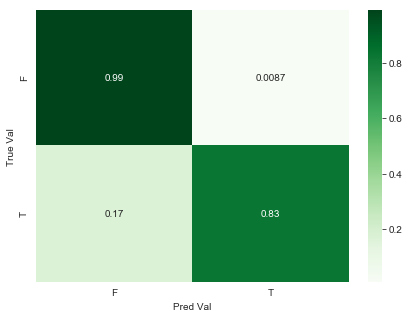

In [38]:
rf_grid_clf = grid_search_classifier(RandomForestClassifier(), param_grid, X_train, X_test, y_train, y_test)

## PCA

In [156]:
X = pulsar_df.drop('target_class', axis=1)
y = pulsar_df['target_class']
features = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

scalar = StandardScaler()
X = scalar.fit_transform(X)

pca = PCA()
principalComponents_train = pca.fit_transform(X_train)
principalDftrain = pd.DataFrame(data=principalComponents_train)

In [157]:
pca2 = PCA()
principalComponents_test = pca2.fit_transform(X_test)
principalDftest = pd.DataFrame(data=principalComponents_test)

In [158]:
eig_values = pca.explained_variance_
eig_vectors = pca.components_

In [159]:
structure_loading_1 = eig_vectors[0]* np.sqrt(eig_values[0])
str_loading_1 = pd.Series(structure_loading_1, index=features)
str_loading_1.sort_values(ascending=False)

 Skewness of the DM-SNR curve                    105.445882
 Mean of the integrated profile                    4.212012
 Excess kurtosis of the DM-SNR curve               4.202441
 Standard deviation of the integrated profile      0.212644
 Excess kurtosis of the integrated profile        -0.252823
 Skewness of the integrated profile               -1.402322
 Mean of the DM-SNR curve                        -11.559083
 Standard deviation of the DM-SNR curve          -11.787078
dtype: float64

Text(0, 0.5, 'proportion of explained variance')

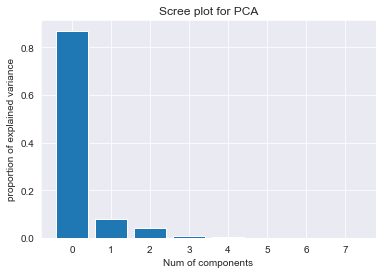

In [160]:
index = np.arange(len(features))
plt.bar(index, pca.explained_variance_ratio_)
plt.title('Scree plot for PCA')
plt.xlabel('Num of components')
plt.ylabel('proportion of explained variance')

Text(0, 0.5, 'explained variance ratio')

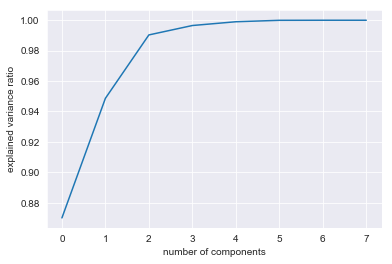

In [161]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('explained variance ratio')

In [162]:
principalDftrain.drop([3,4,5,6,7], axis=1, inplace=True)
principalDftest.drop([3,4,5,6,7], axis=1, inplace=True)
principalDftrain.head()
principalDftrain.shape

(14318, 3)

## Baseline Model

In [21]:
y_train_cat = to_categorical(y_train, num_classes=2)
# y_val_cat = to_categorical(y_val, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)
print(y_train_cat.shape, y_test_cat.shape)

(14318, 2) (3580, 2)


In [146]:
def neural_net_accuracy(fit_model, train_x, val_x, train_y, val_y):
    y_pred = fit_model.predict(val_x)
    
    pred_train = fit_model.predict(train_x).reshape(-1)
    pred_val = y_pred.reshape(-1)  

    MSE_train = np.mean((pred_train-train_y)**2)
    MSE_val = np.mean((pred_val-val_y)**2)

    print("MSE_train:", MSE_train)
    print("MSE_val:", MSE_val)
    
    print()
    
    print(confusion_matrix(train_y, y_pred))
    print(classification_report(val_y, y_pred))
    print('Accuracy score:', round(accuracy_score(val_y, y_pred), 2))

    cm = confusion_matrix(val_y, y_pred)
    df_cm = pd.DataFrame(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis],
                         index=['F', 'T'],
                         columns=['F', 'T'])
    plt.figure(figsize=(7, 5))
    sns.heatmap(df_cm, annot=True, cmap='Greens')
    plt.xlabel('Pred Val')
    plt.ylabel('True Val')
    plt.show()

In [23]:
model = Sequential()
model.add(Dense(2, activation = 'sigmoid'))

model.compile(optimizer= "sgd", loss='mse', metrics=['acc'])
fit_model = model.fit(X_train, y_train_cat, batch_size=32, epochs=10, validation_data=(X_val, y_val_cat))

Train on 12886 samples, validate on 3222 samples
Epoch 1/10
12886/12886 [==============================] - 1s 45us/step - loss: 0.2596 - acc: 0.6094 - val_loss: 0.2171 - val_acc: 0.7986
Epoch 2/10
12886/12886 [==============================] - 0s 37us/step - loss: 0.1810 - acc: 0.8637 - val_loss: 0.1446 - val_acc: 0.9103
Epoch 3/10
12886/12886 [==============================] - 0s 31us/step - loss: 0.1228 - acc: 0.9225 - val_loss: 0.1017 - val_acc: 0.9336
Epoch 4/10
12886/12886 [==============================] - 0s 33us/step - loss: 0.0913 - acc: 0.9420 - val_loss: 0.0778 - val_acc: 0.9541
Epoch 5/10
12886/12886 [==============================] - 0s 30us/step - loss: 0.0722 - acc: 0.9624 - val_loss: 0.0632 - val_acc: 0.9739
Epoch 6/10
12886/12886 [==============================] - 0s 30us/step - loss: 0.0606 - acc: 0.9705 - val_loss: 0.0544 - val_acc: 0.9749
Epoch 7/10
12886/12886 [==============================] - 0s 32us/step - loss: 0.0533 - acc: 0.9714 - val_loss: 0.0485 - val_acc:

## Improving the Model

In [45]:
y_train_hinged = y_train.apply(lambda x: -1 if x == 0 else 1)
y_val_hinged = y_val.apply(lambda x: -1 if x == 0 else 1)
y_test_hinged = y_test.apply(lambda x: -1 if x == 0 else 1)

y_train_hinged = y_train_hinged.values
y_val_hinged = y_val_hinged.values
y_test_hinged = y_test_hinged.values

In [27]:
model = Sequential()
model.add(Dense(100, input_dim=8))
model.add(advanced_activations.LeakyReLU(alpha=0.2))
# model.add(Dense(30))
# model.add(advanced_activations.LeakyReLU(alpha=0.3))
# model.add(Dense(40))
# model.add(advanced_activations.LeakyReLU(alpha=0.3))
# model.add(Dense(50))
# model.add(advanced_activations.LeakyReLU(alpha=0.3))
# model.add(Dense(60))
# model.add(advanced_activations.LeakyReLU(alpha=0.3))
# model.add(Dense(70))
# model.add(advanced_activations.LeakyReLU(alpha=0.3))
# model.add(Dense(80))
# model.add(advanced_activations.LeakyReLU(alpha=0.3))
model.add(Dense(100))
model.add(advanced_activations.LeakyReLU(alpha=0.2))
model.add(Dense(2, activation = 'sigmoid'))


model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['acc'])
fit_model = model.fit(X_train, y_train_cat, batch_size=32, epochs=50, 
                      validation_data=(X_test, y_test_cat))

Train on 14318 samples, validate on 3580 samples
Epoch 1/50
14318/14318 [==============================] - 1s 104us/step - loss: 0.0919 - acc: 0.9766 - val_loss: 0.0868 - val_acc: 0.9753
Epoch 2/50
14318/14318 [==============================] - 1s 56us/step - loss: 0.0669 - acc: 0.9808 - val_loss: 0.0859 - val_acc: 0.9751
Epoch 3/50
14318/14318 [==============================] - 1s 64us/step - loss: 0.0656 - acc: 0.9811 - val_loss: 0.0842 - val_acc: 0.9740
Epoch 4/50
14318/14318 [==============================] - 1s 56us/step - loss: 0.0650 - acc: 0.9815 - val_loss: 0.0825 - val_acc: 0.9765
Epoch 5/50
14318/14318 [==============================] - 1s 56us/step - loss: 0.0651 - acc: 0.9812 - val_loss: 0.0848 - val_acc: 0.9751
Epoch 6/50
14318/14318 [==============================] - 1s 58us/step - loss: 0.0645 - acc: 0.9812 - val_loss: 0.0856 - val_acc: 0.9749
Epoch 7/50
14318/14318 [==============================] - 1s 59us/step - loss: 0.0632 - acc: 0.9818 - val_loss: 0.0845 - val_acc

In [28]:
score = model.evaluate(X_test, y_test_cat, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0829379904057893
Test accuracy: 0.975558659018085


In [29]:
y_pred = model.predict(X_test, batch_size=64, verbose=1)
display(y_pred)

3580/3580 [==============================] - 0s 35us/step


array([[9.9922776e-01, 7.0017576e-04],
       [9.9843466e-01, 1.4724731e-03],
       [9.9742329e-01, 2.4379492e-03],
       ...,
       [1.3366342e-04, 9.9986267e-01],
       [9.9842465e-01, 1.4879107e-03],
       [9.9970090e-01, 3.0019879e-04]], dtype=float32)

In [30]:
y_pred_bool = np.argmax(y_pred, axis=1)
display(y_pred_bool)

array([0, 0, 0, ..., 1, 0, 0])

In [31]:
print(classification_report(y_test.values, y_pred_bool))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3232
           1       0.89      0.85      0.87       348

    accuracy                           0.98      3580
   macro avg       0.94      0.92      0.93      3580
weighted avg       0.97      0.98      0.98      3580

